<a href="https://colab.research.google.com/github/eghrudje/ALTERA_VGA_Controller/blob/main/BCIpractice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d fabriciotorquato/eeg-data-from-hands-movement

 46% 5.00M/10.9M [00:00<00:00, 14.4MB/s]
100% 10.9M/10.9M [00:00<00:00, 27.5MB/s]


In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
path_to_zip_file = "/content/eeg-data-from-hands-movement.zip"
directory_to_extract_to = "/content/"

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), 
dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()    

In [8]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [9]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [10]:
df1 = pd.read_csv('/content/Dataset/user_c.csv', delimiter=',')
df1.dataframeName = 'dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [11]:
df1.head(5)

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,F7 theta std,F7 theta m,F7 alpha std,F7 alpha m,F7 beta std,F7 beta m,F3 delta std,F3 delta m,F3 theta std,F3 theta m,F3 alpha std,F3 alpha m,F3 beta std,F3 beta m,FC5 delta std,FC5 delta m,FC5 theta std,FC5 theta m,FC5 alpha std,FC5 alpha m,FC5 beta std,FC5 beta m,T7 delta std,T7 delta m,T7 theta std,T7 theta m,T7 alpha std,T7 alpha m,T7 beta std,...,T8 delta std,T8 delta m,T8 theta std,T8 theta m,T8 alpha std,T8 alpha m,T8 beta std,T8 beta m,FC6 delta std,FC6 delta m,FC6 theta std,FC6 theta m,FC6 alpha std,FC6 alpha m,FC6 beta std,FC6 beta m,F4 delta std,F4 delta m,F4 theta std,F4 theta m,F4 alpha std,F4 alpha m,F4 beta std,F4 beta m,F8 delta std,F8 delta_m,F8 theta std,F8 theta m,F8 alpha std,F8 alpha m,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1.0,3573.336166,2067.827798,1.334973,2.294574,0.742210,2.052755,3.604952,4.854279,3575.508401,2066.669887,1.084778,2.381439,0.787296,2.264750,1.662652,2.627209,3162.084357,1945.013541,11.289487,28.264224,2.985896,10.816395,3.734147,9.692232,3525.943843,2046.176617,3.422775,4.389719,1.342712,2.362559,1.314226,2.597419,3232.609490,1921.261846,2.336931,4.254824,1.102413,2.773211,1.795979,...,3501.153575,2050.733645,3.650543,5.917492,3.480273,4.720621,1.048850,2.800563,3569.890943,2096.090186,1.933348,3.901764,0.816265,3.986084,1.442993,3.061101,3165.277063,1895.539931,2.942273,8.436232,1.574092,3.374393,3.113235,4.795718,3075.248871,1891.526175,5.664383,17.892404,1.403573,7.364751,3.625333,8.860455,3522.728728,2045.497490,0.750616,2.170167,1.372258,2.098884,2.418585,3.885361
1,1.0,3569.424197,2063.871329,1.639684,2.573080,1.097168,2.678287,2.313650,4.727548,3573.524571,2066.421885,0.850224,2.343867,0.953159,2.387309,1.140827,2.727565,3249.189371,1995.133439,6.740338,28.468912,5.206096,9.168753,3.941203,8.178915,3523.570014,2045.098791,2.641367,4.408077,0.546684,1.875772,1.056488,2.341109,3252.893801,1943.105484,1.900306,9.441814,1.444615,5.053677,2.081671,...,3492.564873,2039.396527,2.604160,4.604397,1.165660,3.586556,1.294618,2.222974,3568.829841,2086.805442,1.490787,6.648118,0.782889,2.640606,1.362956,2.467695,3191.117418,1924.239628,3.518056,7.184931,1.433320,5.240871,3.291384,4.645959,3146.996555,1941.303475,6.007989,19.117357,0.513420,10.674411,3.918033,7.473774,3526.382257,2047.897934,0.799930,2.408514,1.110604,2.154791,2.048773,4.238736
2,1.0,3570.767652,2064.654687,0.706498,2.613442,1.086770,2.222977,2.409857,4.936480,3573.935350,2066.854656,0.937959,2.591709,0.516541,2.656043,1.458444,3.091426,3335.773502,2017.719846,7.699172,16.778008,2.883862,8.499555,3.722070,7.624892,3521.806062,2045.117091,1.649863,4.271827,0.883248,1.104959,1.042940,2.459100,3296.308651,1954.976735,3.350885,9.683910,2.616761,5.280702,1.856623,...,3493.778914,2036.748421,1.145867,5.107076,1.418145,3.291912,1.233152,2.009539,3574.949982,2091.975205,3.022016,6.751731,1.577550,2.308776,1.319921,2.226020,3249.895017,1946.431037,3.966144,14.970894,0.685480,9.958062,2.555700,6.508541,3244.044530,1969.552995,6.431127,20.421576,1.116168,11.578987,4.355499,8.318612,3531.725098,2049.223458,1.411546,2.642449,1.518919,1.738234,1.457515,3.860666
3,1.0,3569.156909,2065.357831,0.940101,2.563546,0.836405,2.151778,2.650254,4.500677,3572.802320,2066.745063,1.140786,2.069404,0.513607,2.832314,1.596238,3.069964,3374.414084,2006.864902,1.906082,8.113148,3.273598,7.676213,4.068687,6.565069,3520.835960,2043.781880,1.083198,3.291128,0.364112,1.283937,1.096775,2.125654,3318.562902,1944.468874,3.204311,7.960988,0.653226,5.323025,2.501129,...,3487.297556,2037.188772,4.173299,7.709398,2.504735,5.216954,1.149455,2.240747,3570.324210,2092.195440,3.848401,7.419586,2.035389,4.309472,1.327303,2.739204,3293.104079,1931.246111,3.134222,4.163015,1.532159,4.062465,1.708961,4.638277,3308.009520,1949.273145,3.863117,7.033583,1.8930

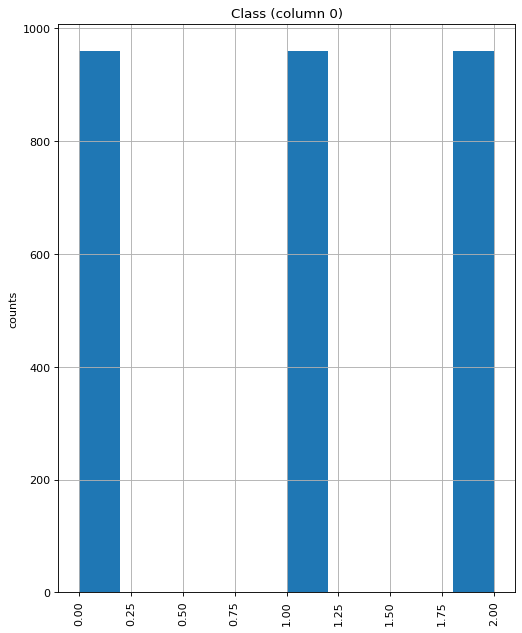

In [12]:
plotPerColumnDistribution(df1, 10, 5)

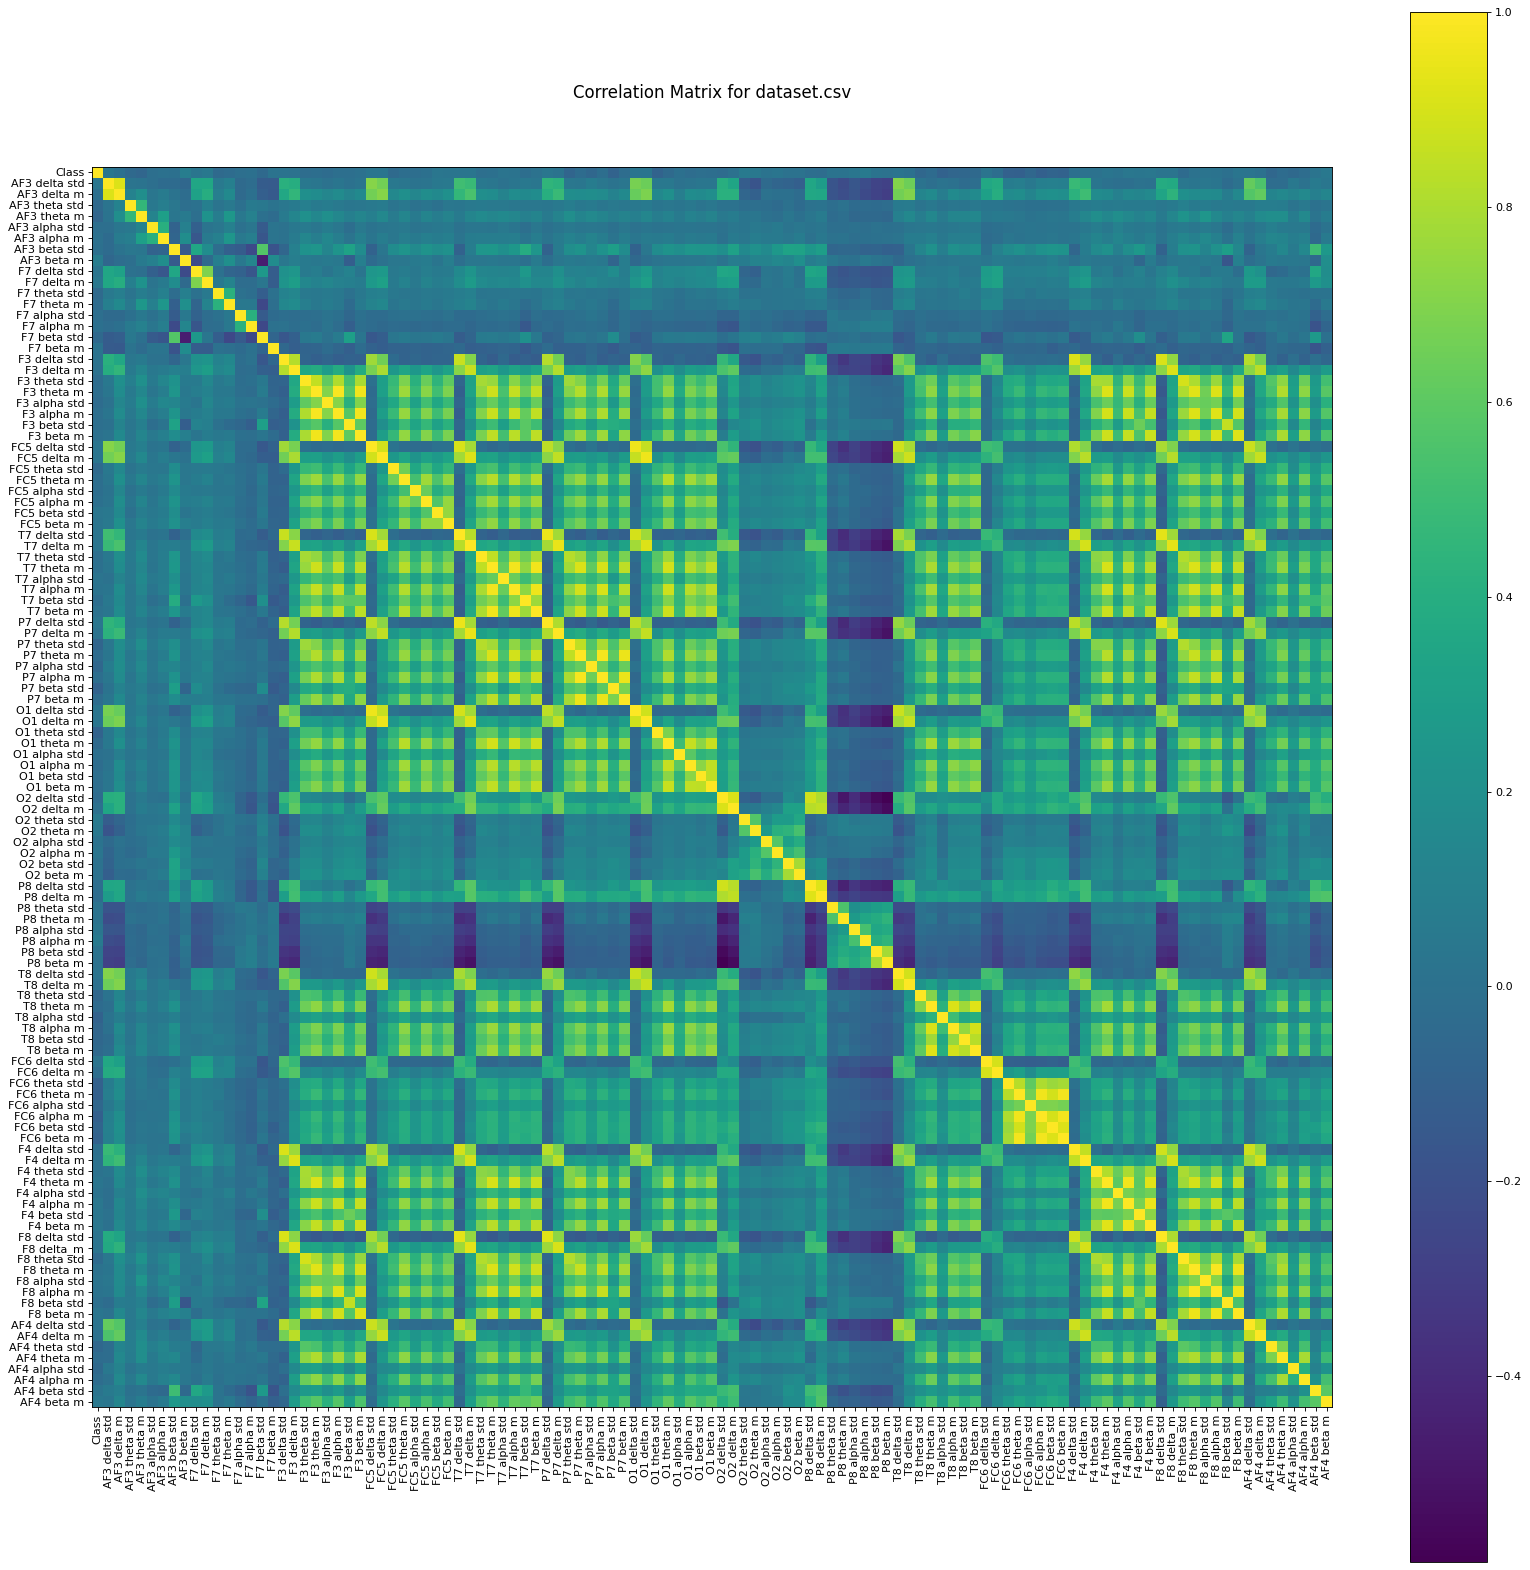

In [13]:
plotCorrelationMatrix(df1, 25)

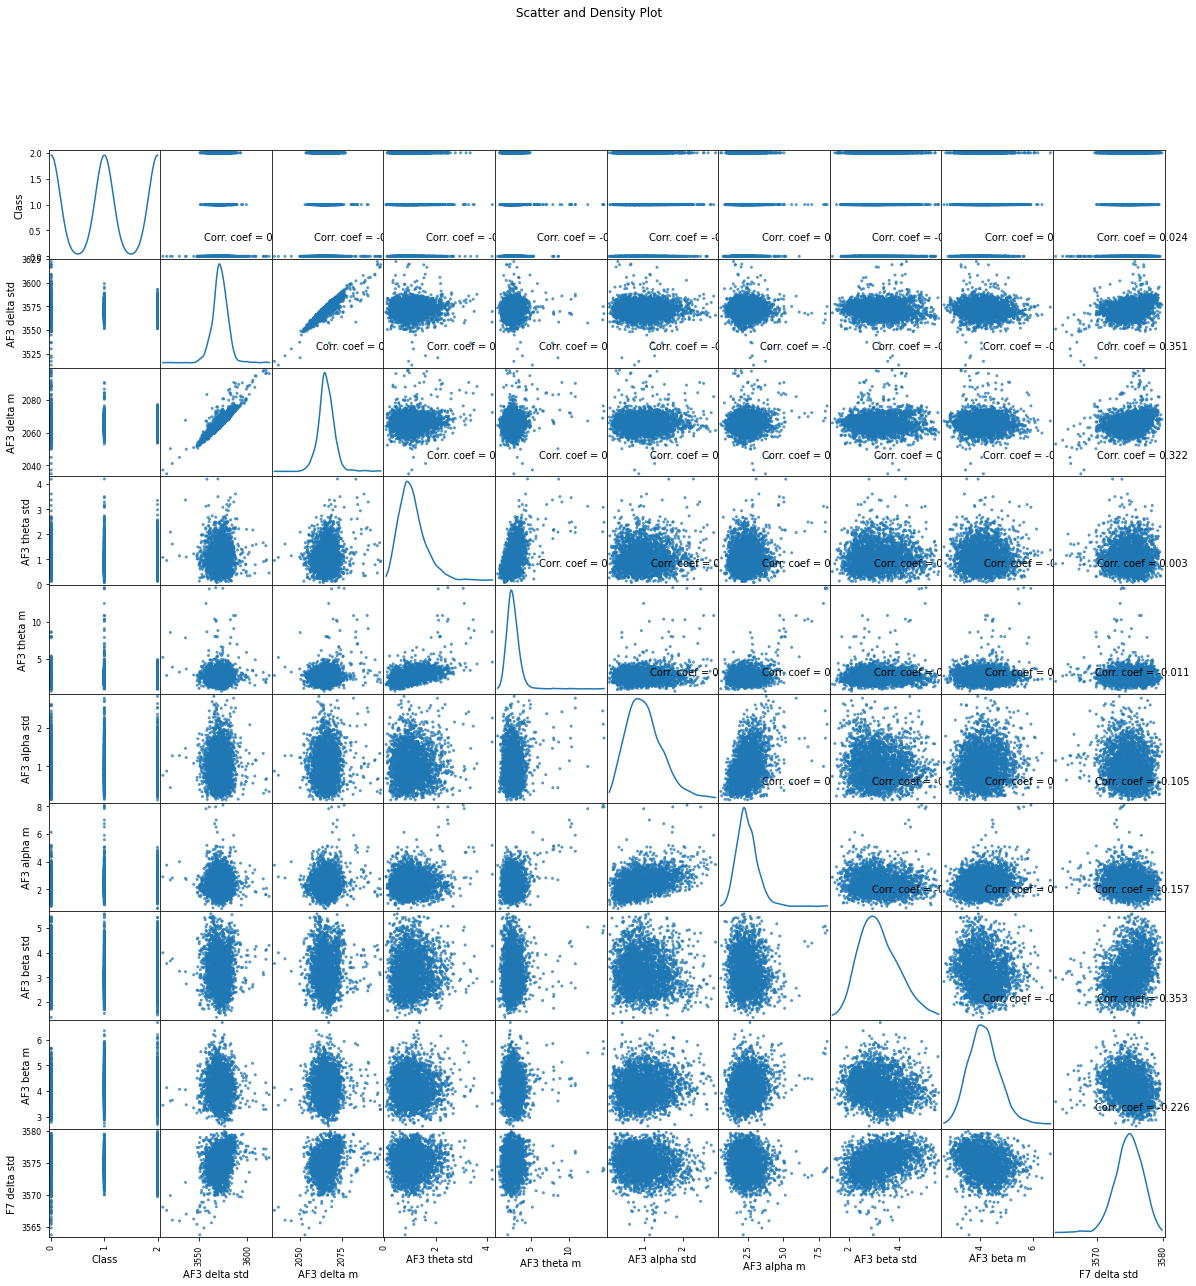

In [14]:
plotScatterMatrix(df1, 20, 10)

In [15]:
df2 = pd.read_csv('/content/Dataset/user_b.csv', delimiter=',')
df2.dataframeName = 'dataset.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [16]:
df3 = pd.read_csv('/content/Dataset/user_d.csv', delimiter=',')
df3.dataframeName = 'dataset.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [17]:
df3 = pd.read_csv('/content/Dataset/user_a.csv', delimiter=',')
df3.dataframeName = 'dataset.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [19]:
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import gc
gc.enable()

In [20]:
dataset = pd.read_csv('/content/Dataset/user_a.csv', delimiter=',')

In [21]:
dataset_users = [pd.read_csv('/content/Dataset/user_'+user+'.csv', delimiter=',') for user in ['a','b','c','d']]

In [22]:
dataset.head()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,F7 theta std,F7 theta m,F7 alpha std,F7 alpha m,F7 beta std,F7 beta m,F3 delta std,F3 delta m,F3 theta std,F3 theta m,F3 alpha std,F3 alpha m,F3 beta std,F3 beta m,FC5 delta std,FC5 delta m,FC5 theta std,FC5 theta m,FC5 alpha std,FC5 alpha m,FC5 beta std,FC5 beta m,T7 delta std,T7 delta m,T7 theta std,T7 theta m,T7 alpha std,T7 alpha m,T7 beta std,...,T8 delta std,T8 delta m,T8 theta std,T8 theta m,T8 alpha std,T8 alpha m,T8 beta std,T8 beta m,FC6 delta std,FC6 delta m,FC6 theta std,FC6 theta m,FC6 alpha std,FC6 alpha m,FC6 beta std,FC6 beta m,F4 delta std,F4 delta m,F4 theta std,F4 theta m,F4 alpha std,F4 alpha m,F4 beta std,F4 beta m,F8 delta std,F8 delta_m,F8 theta std,F8 theta m,F8 alpha std,F8 alpha m,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1.0,3569.164550,2063.892754,1.673726,4.444736,0.526209,3.002088,1.425022,3.302739,3563.803888,2060.239057,1.404089,2.279398,1.297401,1.960079,0.759956,2.038977,3709.009712,2180.647682,19.491141,39.847419,20.493348,41.228796,46.007372,73.493233,3567.365265,2062.483097,1.209996,1.771811,0.161793,1.818490,0.688672,1.641767,3559.219279,2057.363361,1.027551,2.502389,1.495156,2.207701,1.029114,...,3636.780856,2138.663493,19.310670,36.200836,15.881327,38.774853,43.601995,69.778363,3694.245877,2174.777021,18.426524,40.488393,16.410505,38.850336,45.329263,72.907800,3577.521434,2067.996962,1.232973,3.073659,0.919419,2.634124,3.348698,5.380652,3665.336755,2157.675046,15.543111,37.374199,15.907312,40.854795,45.468326,72.508750,3701.186330,2182.676835,18.192418,41.349662,16.004756,42.046467,46.280843,73.565719
1,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,2059.969372,0.694171,1.971073,0.756398,1.637064,0.963158,2.117719,3721.781859,2177.507069,7.343344,39.152753,20.145638,32.934098,38.525474,68.196685,3566.746758,2061.497984,0.740290,1.815878,1.153479,1.583097,0.574245,1.616353,3559.526890,2057.324677,0.986897,2.406373,0.779043,2.993743,1.090381,...,3649.124313,2136.305537,9.666578,34.522405,17.767788,26.998472,36.178953,64.661308,3708.391961,2171.961977,10.150358,39.040007,16.553371,28.600763,38.483312,67.962618,3578.776662,2068.731565,1.218218,2.128704,0.352964,3.215416,3.412938,4.803989,3679.285737,2156.011819,9.227783,35.553815,18.089263,28.408800,36.551948,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041
2,1.0,3568.157929,2062.445859,2.798014,2.574504,1.120537,1.958819,0.982433,2.258622,3563.279981,2059.543651,0.493677,1.222808,0.955544,2.642443,0.725119,1.846020,3723.289253,2176.284578,18.590902,25.349995,17.772827,19.884104,44.163109,68.365284,3566.653610,2061.533231,0.593558,1.830077,0.839921,1.533928,1.032268,1.885158,3558.225822,2057.441208,0.899122,2.312432,1.325438,2.295383,0.908968,...,3651.585904,2135.555927,18.112467,23.514646,9.089433,20.463689,40.165128,64.768686,3708.552141,2169.886880,19.450478,24.764949,15.423059,20.797828,42.884410,68.191273,3580.053926,2070.314385,1.129198,2.083349,1.628629,2.715756,3.462284,4.599409,3679.393107,2153.555265,19.979258,24.464488,13.488471,17.791111,40.754308,66.816547,3724.417296,2176.823208,18.159202,23.612639,14.378291,19.555084,43.210004,67.781924
3,1.0,3567.710021,2062.112673,2.181775,3.610507,0.629608,2.155876,0.856275,2.233711,3562.787801,2059.317489,0.509250,1.478831,0.848642,2.539217,1.013335,1.562917,3727.061652,2181.935715,16.831394,32.474502,17.477847,23.278668,41.635879,65.650281,3566.313364,2061.497351,1.220105,1.708304,0.681477,1.139439,1.022393,1.847746,3557.952287,2057.698035,0.944458,2.068626,0.972430,1.510003,1.146271,...,3653.643417,2138.967337,19.870080,28.164362,13.937815,19.992277,37.654372,61.869855,3712.709484,2174.256181,19.891011,31.719748,15.828046,26.779568,40.708965,64.960239,3580.174518,2070.019706,0.933352,1

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 113 entries, Class to AF4 beta m
dtypes: float64(113)
memory usage: 2.5 MB


In [24]:
dataset.describe()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,F7 delta m,F7 theta std,F7 theta m,F7 alpha std,F7 alpha m,F7 beta std,F7 beta m,F3 delta std,F3 delta m,F3 theta std,F3 theta m,F3 alpha std,F3 alpha m,F3 beta std,F3 beta m,FC5 delta std,FC5 delta m,FC5 theta std,FC5 theta m,FC5 alpha std,FC5 alpha m,FC5 beta std,FC5 beta m,T7 delta std,T7 delta m,T7 theta std,T7 theta m,T7 alpha std,T7 alpha m,T7 beta std,...,T8 delta std,T8 delta m,T8 theta std,T8 theta m,T8 alpha std,T8 alpha m,T8 beta std,T8 beta m,FC6 delta std,FC6 delta m,FC6 theta std,FC6 theta m,FC6 alpha std,FC6 alpha m,FC6 beta std,FC6 beta m,F4 delta std,F4 delta m,F4 theta std,F4 theta m,F4 alpha std,F4 alpha m,F4 beta std,F4 beta m,F8 delta std,F8 delta_m,F8 theta std,F8 theta m,F8 alpha std,F8 alpha m,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,...,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.000000,3572.735546,2065.177641,1.037918,2.477254,0.949795,2.310609,2.224140,3.311305,3566.919323,2061.475469,0.915266,2.198822,0.911069,2.148930,1.267518,2.204430,3609.283222,2107.669889,7.365066,18.651163,7.892807,20.101207,38.937885,41.721083,3563.358214,2059.140221,0.744980,1.782091,0.760756,1.820407,1.073864,1.900516,3561.210451,2058.009882,0.808006,1.949068,0.931476,2.157246,1.001714,...,3580.348408,2085.020492,4.778879,12.255055,5.129853,13.120997,26.056258,27.890968,3609.189432,2106.891485,7.016836,17.792567,7.517694,19.136169,37.186708,39.870717,3575.583799,2070.095986,1.445606,3.480339,1.278338,3.107545,3.597733,4.902271,3624.125016,2111.981350,5.852861,14.728245,6.207381,15.778544,30.670347,33.031491,3607.576448,2107.007956,6.684569,17.003011,7.309571,18.548518,36.497788,39.097939
std,0.816638,2.196760,1.529244,0.496783,0.963555,0.435073,0.771319,0.569616,0.394712,1.842509,1.142210,0.407005,0.622831,0.398641,0.559569,0.314351,0.270226,42.621350,37.863880,6.030292,15.864607,6.078504,13.129318,15.259868,14.345719,2.276157,1.623269,0.370943,0.627834,0.378702,0.626366,0.351804,0.458941,2.361581,1.500160,0.379636,0.620327,0.468706,0.675416,0.274407,...,37.910658,29.342534,4.266288,11.594823,4.143089,9.192732,11.919567,11.099139,41.408426,36.104063,5.716330,14.806757,5.609825,12.118708,14.359098,13.185078,24.449234,19.502765,0.932408,2.483177,0.675188,1.466448,1.375751,1.615229,38.515024,30.114746,4.836064,12.642497,4.862396,10.561918,13.911802,12.894324,42.043787,33.849007,5.398308,14.129471,5.677376,12.036952,15.384302,14.104989
min,0.000000,3552.889260,2059.383202,0.030171,0.601632,0.075538,0.733693,0.767053,1.579466,3558.922185,2056.887094,0.045513,0.563707,0.064104,0.549910,0.484244,1.142108,2585.303470,2035.661318,0.262830,1.735576,0.193787,1.759409,13.891237,16.307010,3555.968800,2055.003383,0.025169,0.318315,0.053003,0.285809,0.242107,0.714344,3552.708549,2052.611003,0.038175,0.399870,0.032215,0.577267,0.342127,...,2646.618578,1969.790943,0.256026,1.244077,0.143798,1.519402,9.569340,11.419181,2565.72410

In [25]:
target = 'Class'

In [26]:
col = dataset.columns       # .columns gives columns names in data
features = col[1:]
print(features)

Index(['AF3 delta std', 'AF3 delta m', 'AF3 theta std', 'AF3 theta m',
       'AF3 alpha std', 'AF3 alpha m', 'AF3 beta std', 'AF3 beta m',
       'F7 delta std', 'F7 delta m',
       ...
       'F8 beta std', 'F8 beta m', 'AF4 delta std', 'AF4 delta m',
       'AF4 theta std', 'AF4 theta m', 'AF4 alpha std', 'AF4 alpha m',
       'AF4 beta std', 'AF4 beta m'],
      dtype='object', length=112)


In [27]:
dataset[target].value_counts()

0.0    960
2.0    960
1.0    960
Name: Class, dtype: int64

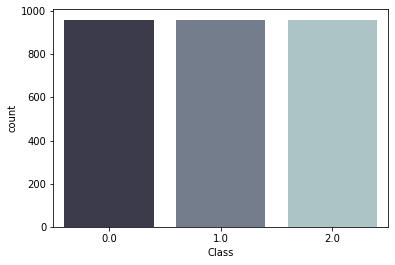

In [28]:
sns.countplot(x=target, data=dataset, palette="bone")
plt.show()

In [29]:
list_cor = pd.DataFrame(dataset[features].corr().unstack().abs().sort_values().drop_duplicates())
list_cor.columns = ['correlation_index']
list_corr_high = list(list_cor[-33:-1]['correlation_index'].index)
list_corr_high

[('P7 theta m', 'AF4 theta m'),
 ('F8 alpha m', 'FC6 alpha m'),
 ('F3 beta std', 'F8 beta std'),
 ('FC6 theta m', 'F8 theta m'),
 ('AF4 beta m', 'F8 beta m'),
 ('AF4 alpha m', 'FC6 alpha m'),
 ('FC6 beta m', 'F8 beta m'),
 ('P7 beta m', 'F3 beta m'),
 ('P7 theta m', 'F3 theta m'),
 ('F3 alpha m', 'FC6 alpha m'),
 ('F3 alpha m', 'AF4 alpha m'),
 ('FC6 theta m', 'P7 theta m'),
 ('P7 theta m', 'F8 theta m'),
 ('T8 beta std', 'P7 beta std'),
 ('F3 theta m', 'FC6 theta m'),
 ('AF4 beta std', 'F8 beta std'),
 ('FC6 beta std', 'F8 beta std'),
 ('F8 beta m', 'T8 beta m'),
 ('F3 beta std', 'P7 beta std'),
 ('FC6 beta m', 'P7 beta m'),
 ('FC6 beta m', 'F3 beta m'),
 ('AF4 beta m', 'P7 beta m'),
 ('FC6 beta m', 'AF4 beta m'),
 ('F8 beta std', 'T8 beta std'),
 ('F8 beta m', 'P7 beta m'),
 ('F3 beta std', 'FC6 beta std'),
 ('FC6 beta std', 'AF4 beta std'),
 ('P7 beta std', 'FC6 beta std'),
 ('F3 beta m', 'AF4 beta m'),
 ('P7 beta std', 'AF4 beta std'),
 ('P7 beta std', 'F8 beta std'),
 ('AF4 beta s

In [30]:
total = dataset[features].isnull().sum().sort_values(ascending = False)
percent = (dataset[features].isnull().sum()/dataset[features].isnull().count()*100).sort_values(ascending = False)
missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing


,Total,Percent
AF4 beta m,0,0.0
AF4 beta std,0,0.0
FC5 alpha m,0,0.0
FC5 beta std,0,0.0
FC5 beta m,0,0.0
...,...,...
T8 beta std,0,0.0
T8 beta m,0,0.0
FC6 delta std,0,0.0
FC6 delta m,0,0.0


In [31]:
def preprocess_inputs(df, features, target):        
    
    list_cor = pd.DataFrame(df[features].corr().unstack().abs().sort_values().drop_duplicates())
    list_cor.columns = ['correlation_index']
    list_corr_high = list(list_cor[-33:-1]['correlation_index'].index)
    list_corr_high
    
    for eletrods in list_corr_high:
        df['__'.join(list(eletrods))] = df.apply(lambda row: abs(row[eletrods[0]] - row[eletrods[1]]), axis=1)
    
    col = df.columns       # .columns gives columns names in data
    features = col[1:]

    df[target] = df[target].apply(lambda value: 0 if value == 2 else 1)
    

    # Separate majority and minority classes
    df_majority = df[df[target]==1]
    df_minority = df[df[target]==0]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=len(df_majority),    # to match majority class
                                     random_state=123) # reproducible results
    df = pd.concat([df_majority, df_minority_upsampled])
    
    y = df.drop(features, axis=1)
    y = to_categorical(y)
    X = df[features]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    # Scale X with a standard scaler
    transformer = StandardScaler() 

    X_train_transformer = transformer.fit_transform(X_train)
    X_test_transformer = transformer.transform(X_test)

    return X_train_transformer, X_test_transformer, y_train, y_test

In [32]:
def build_model(X):  
    k2 = int(X.shape[1]**(1/2))
    inputs = tf.keras.Input(shape=(X.shape[1],))
    expand_dims = tf.reshape(inputs, (-1,k2, k2), name=None)
    lstm = tf.keras.layers.LSTM(16, return_sequences=True)(expand_dims)
    drop = tf.keras.layers.Dropout(.2)(lstm) 
    flatten = tf.keras.layers.Flatten()(drop)
    outputs = tf.keras.layers.Dense(2, activation='softmax')(flatten)    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [33]:
def train_model(dataset, features, target, build_model=build_model):
    X_train, X_test, y_train, y_test = preprocess_inputs(dataset, features, target)

    class_model = build_model(X_train)

    history = class_model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        batch_size=32,
        epochs=30,
        verbose=0,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            )
        ]
    )

    print("Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(history.history['accuracy'])*100, np.std(history.history['accuracy'])*100)) 

    class_acc = class_model.evaluate(X_test, y_test, verbose=0)[1]
    print("Test Accuracy (Class Model): {:.2f}%".format(class_acc * 100))
    
    y_pred = np.array(list(map(lambda x: np.argmax(x), class_model.predict(X_test))))
    clr = classification_report(y_test.argmax(axis=-1) , y_pred)
    print("Classification Report:\n----------------------\n", clr)
    
    return history

In [34]:
def plot_accuracy_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [35]:
def plot_loss_history(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Accuracy: 80.13% (+/- 8.97%)
Test Accuracy (Class Model): 84.11%
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       562
           1       0.91      0.76      0.83       590

    accuracy                           0.84      1152
   macro avg       0.85      0.84      0.84      1152
weighted avg       0.85      0.84      0.84      1152



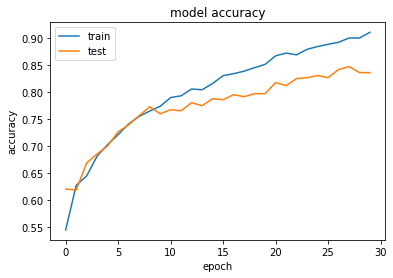

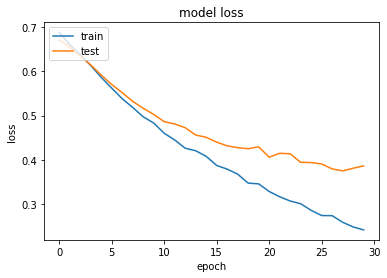

Accuracy: 82.99% (+/- 9.47%)
Test Accuracy (Class Model): 86.11%
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       562
           1       0.84      0.90      0.87       590

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152



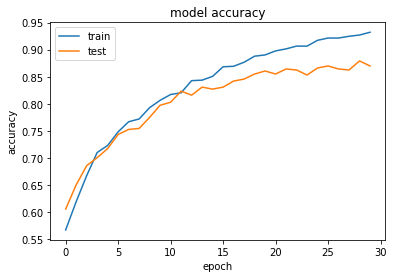

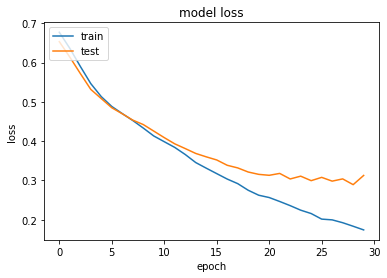

Accuracy: 68.90% (+/- 8.27%)
Test Accuracy (Class Model): 63.63%
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       562
           1       0.67      0.57      0.61       590

    accuracy                           0.64      1152
   macro avg       0.64      0.64      0.64      1152
weighted avg       0.64      0.64      0.63      1152



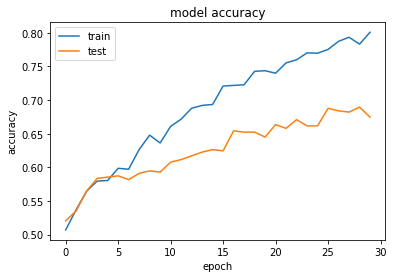

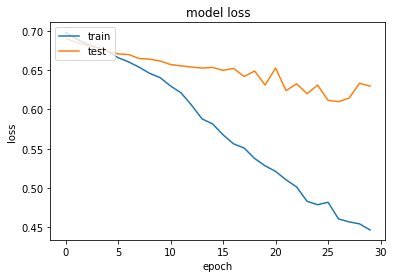

Accuracy: 76.96% (+/- 9.56%)
Test Accuracy (Class Model): 78.12%
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.74      0.86      0.79       562
           1       0.84      0.71      0.77       590

    accuracy                           0.78      1152
   macro avg       0.79      0.78      0.78      1152
weighted avg       0.79      0.78      0.78      1152



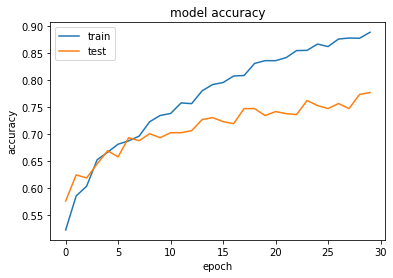

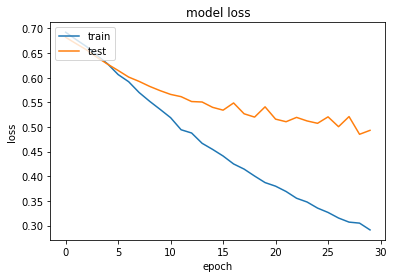

In [36]:
for dfs in dataset_users:
    history = train_model(dfs, features, target)
    plot_accuracy_history(history)
    plot_loss_history(history)